In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 80)

from sklearn.preprocessing import LabelEncoder
import time

In [5]:
df = pd.read_csv('CIC-IDS-2019/cicddos2019_dataset.csv')

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431371 entries, 0 to 431370
Data columns (total 80 columns):
Unnamed: 0                  431371 non-null int64
Protocol                    431371 non-null int64
Flow Duration               431371 non-null int64
Total Fwd Packets           431371 non-null int64
Total Backward Packets      431371 non-null int64
Fwd Packets Length Total    431371 non-null float64
Bwd Packets Length Total    431371 non-null float64
Fwd Packet Length Max       431371 non-null float64
Fwd Packet Length Min       431371 non-null float64
Fwd Packet Length Mean      431371 non-null float64
Fwd Packet Length Std       431371 non-null float64
Bwd Packet Length Max       431371 non-null float64
Bwd Packet Length Min       431371 non-null float64
Bwd Packet Length Mean      431371 non-null float64
Bwd Packet Length Std       431371 non-null float64
Flow Bytes/s                431371 non-null float64
Flow Packets/s              431371 non-null float64
Flow IAT Mean  

In [8]:
df.columns

Index(['Unnamed: 0', 'Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [9]:
df['Label'].value_counts()

DrDoS_NTP        121368
TFTP              98917
Benign            97831
Syn               49373
UDP               18090
DrDoS_UDP         10420
UDP-lag            8872
MSSQL              8523
DrDoS_MSSQL        6212
DrDoS_DNS          3669
DrDoS_SNMP         2717
LDAP               1906
DrDoS_LDAP         1440
Portmap             685
NetBIOS             644
DrDoS_NetBIOS       598
UDPLag               55
WebDDoS              51
Name: Label, dtype: int64

In [10]:
len(df['Label'].value_counts())

18

In [11]:
df['Class'].value_counts()

Attack    333540
Benign     97831
Name: Class, dtype: int64

In [12]:
del df['Unnamed: 0']
del df['Class']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431371 entries, 0 to 431370
Data columns (total 78 columns):
Protocol                    431371 non-null int64
Flow Duration               431371 non-null int64
Total Fwd Packets           431371 non-null int64
Total Backward Packets      431371 non-null int64
Fwd Packets Length Total    431371 non-null float64
Bwd Packets Length Total    431371 non-null float64
Fwd Packet Length Max       431371 non-null float64
Fwd Packet Length Min       431371 non-null float64
Fwd Packet Length Mean      431371 non-null float64
Fwd Packet Length Std       431371 non-null float64
Bwd Packet Length Max       431371 non-null float64
Bwd Packet Length Min       431371 non-null float64
Bwd Packet Length Mean      431371 non-null float64
Bwd Packet Length Std       431371 non-null float64
Flow Bytes/s                431371 non-null float64
Flow Packets/s              431371 non-null float64
Flow IAT Mean               431371 non-null float64
Flow IAT Std 

In [14]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Label']= label_encoder.fit_transform(df['Label'])

df['Label'].unique()

array([14,  9,  0, 11, 12, 10, 16,  8,  1, 15, 17, 13,  7,  6,  5,  2,  3,
        4], dtype=int64)

In [15]:
df.columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Fla

# Feature Selection

In [16]:
X = df.drop(["Label"],axis =1)
y = df["Label"]

In [17]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

selector = SelectPercentile(mutual_info_classif, percentile=10)
X_reduced = selector.fit_transform(X, y)
X_reduced.shape


(431371, 8)

In [18]:
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Packet Length Min',
 'Packet Length Max',
 'Packet Length Mean',
 'Avg Packet Size',
 'Avg Fwd Segment Size']

In [19]:
df = df[['Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Packet Length Min',
 'Packet Length Max',
 'Packet Length Mean',
 'Avg Packet Size',
 'Avg Fwd Segment Size',
                  'Label']]
df.to_csv('cicids2019_red.csv')

In [20]:
from sklearn.model_selection import train_test_split
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_reduced,y, test_size=0.20, random_state=42)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [22]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# SVM

In [23]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

svc_acc = accuracy_score(y_pred, y_test)
svc_prec = precision_score(y_pred, y_test,average='weighted')
svc_rec = recall_score(y_pred, y_test,average='weighted')
svc_f1 = f1_score(y_pred, y_test,average='weighted')

In [24]:
storeResults('SVM',svc_acc,svc_prec,svc_rec,svc_f1)

# Bagging Classifier

In [25]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

clf = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

bag_acc = accuracy_score(y_pred, y_test)
bag_prec = precision_score(y_pred, y_test,average='weighted')
bag_rec = recall_score(y_pred, y_test,average='weighted')
bag_f1 = f1_score(y_pred, y_test,average='weighted')

In [26]:
storeResults('Bagging Classifier',bag_acc,bag_prec,bag_rec,bag_f1)

# Voting Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)
clf2 = DecisionTreeClassifier(random_state=10)

eclf1 = VotingClassifier(estimators=[('bagging', clf1), ('dt', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [28]:
storeResults('Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1)

# DL

In [29]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced,y, test_size=0.20, random_state=42)

In [31]:
#X_train=X_train.values
#X_test=X_test.values

X_train = X_train.reshape(-1, X_train.shape[1],1)
X_test = X_test.reshape(-1, X_test.shape[1],1)

Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

# LSTM

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN
from tensorflow.keras.layers import Dropout
from keras import regularizers
import tensorflow as tf

In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout
from keras import regularizers
import tensorflow as tf

# define a function to build the keras model
def create_model(input_shape):
    # create model
    d = 0.25
    model = Sequential()
    
    model.add(LSTM(32, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))

    model.add(LSTM(64, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))
        
    model.add(LSTM(128, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))

    model.add(LSTM(256, input_shape=input_shape, activation='relu', return_sequences=False))
    model.add(Dropout(d))
   
    model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))
    
    # compile model
    adam = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.00001)
    #model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model(input_shape=(8,1))
#print(model.summary())

In [34]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=5, batch_size=5, verbose=1, steps_per_epoch=500, validation_steps=500)

Epoch 1/5
500/500 [==============================] - 33s 21ms/step - loss: nan - accuracy: 0.2454 - val_loss: nan - val_accuracy: 0.2296
Epoch 2/5
500/500 [==============================] - 9s 19ms/step - loss: nan - accuracy: 0.2555 - val_loss: nan - val_accuracy: 0.2296
Epoch 3/5
500/500 [==============================] - 9s 19ms/step - loss: nan - accuracy: 0.2577 - val_loss: nan - val_accuracy: 0.2296
Epoch 4/5
500/500 [==============================] - 9s 19ms/step - loss: nan - accuracy: 0.2231 - val_loss: nan - val_accuracy: 0.2296
Epoch 5/5
500/500 [==============================] - 9s 19ms/step - loss: nan - accuracy: 0.2236 - val_loss: nan - val_accuracy: 0.2296


In [35]:
import matplotlib.pyplot as plt

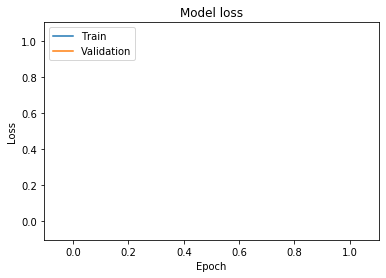

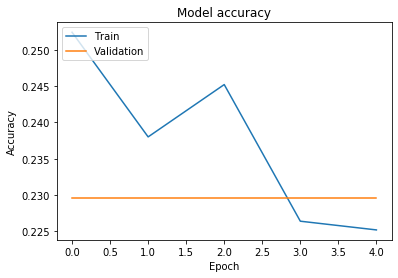

In [36]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [37]:
y_pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

lstm_acc = accuracy_score(y_pred, y_test)
lstm_prec = precision_score(y_pred, y_test,average='weighted')
lstm_rec = recall_score(y_pred, y_test,average='weighted')
lstm_f1 = f1_score(y_pred, y_test,average='weighted')

2697/2697 [==============================] - 24s 8ms/step


In [38]:
storeResults('LSTM',lstm_acc,lstm_prec,lstm_rec,lstm_f1)

# RNN

In [39]:
def create_model(input_shape):
    # create model
    d = 0.25
    model = Sequential()
    
    model.add(SimpleRNN(32, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))

    model.add(SimpleRNN(64, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))
        
    model.add(SimpleRNN(128, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))

    model.add(SimpleRNN(256, input_shape=input_shape, activation='relu', return_sequences=False))
    model.add(Dropout(d))
   
    model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))
    
    # compile model
    adam = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.00001)
    #model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model(input_shape=(8,1))
#print(model.summary())

In [40]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=5, batch_size=5, verbose=1, steps_per_epoch=500, validation_steps=500)

Epoch 1/5
500/500 [==============================] - 11s 8ms/step - loss: nan - accuracy: 0.2210 - val_loss: nan - val_accuracy: 0.2296
Epoch 2/5
500/500 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.2379 - val_loss: nan - val_accuracy: 0.2296
Epoch 3/5
500/500 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.2243 - val_loss: nan - val_accuracy: 0.2296
Epoch 4/5
500/500 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.2459 - val_loss: nan - val_accuracy: 0.2296
Epoch 5/5
500/500 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.2149 - val_loss: nan - val_accuracy: 0.2296


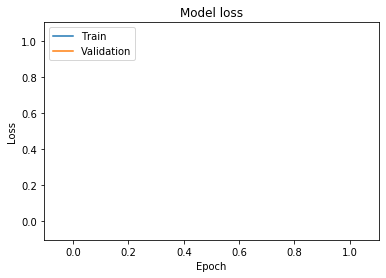

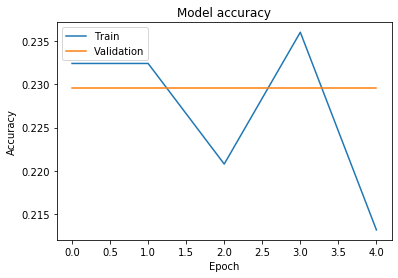

In [41]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [42]:
y_pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

rnn_acc = accuracy_score(y_pred, y_test)
rnn_prec = precision_score(y_pred, y_test,average='weighted')
rnn_rec = recall_score(y_pred, y_test,average='weighted')
rnn_f1 = f1_score(y_pred, y_test,average='weighted')

2697/2697 [==============================] - 6s 2ms/step


In [43]:
storeResults('RNN',rnn_acc,rnn_prec,rnn_rec,rnn_f1)

# CNN + LSTM

In [44]:
import tensorflow as tf
tf.keras.backend.clear_session()

model1 = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=1,padding="causal",activation="relu",input_shape=(X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(18)
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(5e-4,
                                                             decay_steps=1000000,
                                                             decay_rate=0.98,
                                                             staircase=False)

model1.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 8, 64)             384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 7, 64)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7, 32)             6176      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6, 32)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 6, 128)            82432     
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               9

In [45]:
modelhistory = model1.fit(X_train, Y_train, epochs=5, verbose=1, validation_split=0.2, batch_size = 16)

Epoch 1/5
17255/17255 [==============================] - 74s 4ms/step - loss: 0.0335 - acc: 0.7318 - val_loss: 0.0214 - val_acc: 0.8359
Epoch 2/5
17255/17255 [==============================] - 74s 4ms/step - loss: 0.0226 - acc: 0.8335 - val_loss: 0.0164 - val_acc: 0.8537
Epoch 3/5
17255/17255 [==============================] - 72s 4ms/step - loss: 0.0193 - acc: 0.8489 - val_loss: 0.0143 - val_acc: 0.8577
Epoch 4/5
17255/17255 [==============================] - 83s 5ms/step - loss: 0.0175 - acc: 0.8577 - val_loss: 0.0131 - val_acc: 0.8634
Epoch 5/5
17255/17255 [==============================] - 78s 4ms/step - loss: 0.0162 - acc: 0.8634 - val_loss: 0.0121 - val_acc: 0.8685


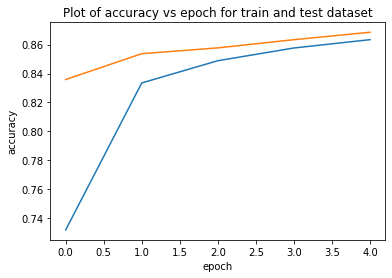

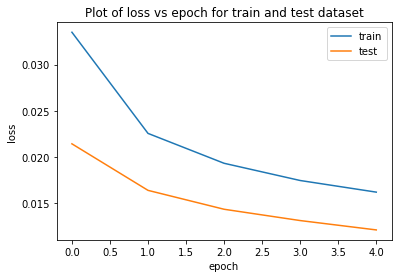

In [46]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(modelhistory.history['acc'])
plt.plot(modelhistory.history['val_acc'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Plot of loss vs epoch for train and test dataset
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [47]:
y_pred = model1.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

ense_acc = accuracy_score(y_pred, y_test)
ense_prec = precision_score(y_pred, y_test,average='weighted')
ense_rec = recall_score(y_pred, y_test,average='weighted')
ense_f1 = f1_score(y_pred, y_test,average='weighted')

2697/2697 [==============================] - 5s 2ms/step


In [48]:
storeResults('CNN + LSTM',ense_acc,ense_prec,ense_rec,ense_f1)

# FNN

In [49]:
from tensorflow.keras import models, layers, optimizers, regularizers
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm

In [50]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_reduced,y, test_size=0.20, random_state=42)

In [51]:
x_train = preprocessing.normalize(X_train)
x_test = preprocessing.normalize(X_test)

In [52]:
hidden_units = 10     # how many neurons in the hidden layer
activation = 'relu'   # activation function for hidden layer
l2 = 0.01             # regularization - how much we penalize large parameter values
learning_rate = 0.01  # how big our steps are in gradient descent
epochs = 5            # how many epochs to train for
batch_size = 2       # how many samples to use for each gradient descent update

In [53]:
# create a sequential model
model2 = models.Sequential()

# add the hidden layer
model2.add(layers.Dense(input_dim=8,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model2.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model2.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

In [54]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [55]:
history = model2.fit(x_train, y_train, epochs=5, batch_size=batch_size,steps_per_epoch=1000, validation_steps=1000)

Epoch 1/5
1000/1000 [==============================] - ETA: 8:17 - loss: -1.7837 - accuracy: 0.0000e+0 - ETA: 0s - loss: -20.6045 - accuracy: 0.0000e+0 - ETA: 0s - loss: -101.6391 - accuracy: 0.0137   - ETA: 0s - loss: -317.9685 - accuracy: 0.010 - ETA: 0s - loss: -649.3228 - accuracy: 0.008 - ETA: 0s - loss: -957.4291 - accuracy: 0.010 - ETA: 0s - loss: -1495.3120 - accuracy: 0.01 - ETA: 0s - loss: -2065.8394 - accuracy: 0.01 - ETA: 0s - loss: -2560.3809 - accuracy: 0.01 - ETA: 0s - loss: -3355.7524 - accuracy: 0.01 - ETA: 0s - loss: -4268.6606 - accuracy: 0.01 - 1s 581us/step - loss: -4829.4263 - accuracy: 0.0115
Epoch 2/5
1000/1000 [==============================] - ETA: 1s - loss: -19681.4551 - accuracy: 0.0000e+0 - ETA: 0s - loss: -15361.7217 - accuracy: 0.0132    - ETA: 0s - loss: -16992.4102 - accuracy: 0.015 - ETA: 0s - loss: -18955.3027 - accuracy: 0.018 - ETA: 0s - loss: -20564.3242 - accuracy: 0.016 - ETA: 0s - loss: -22365.1543 - accuracy: 0.016 - ETA: 0s - loss: -24272.027

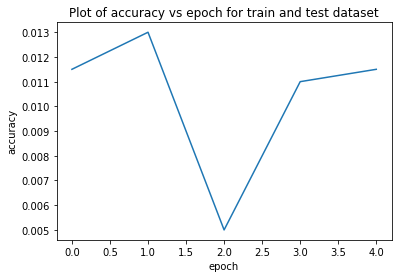

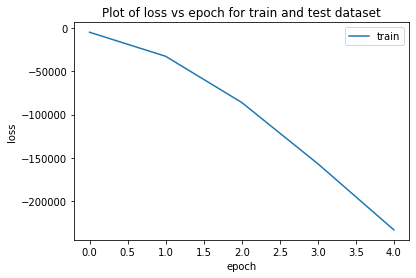

In [56]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [57]:
y_pred = model2.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

dnn_acc = accuracy_score(y_pred, y_test)
dnn_prec = precision_score(y_pred, y_test,average='weighted')
dnn_rec = recall_score(y_pred, y_test,average='weighted')
dnn_f1 = f1_score(y_pred, y_test,average='weighted')

2697/2697 [==============================] - ETA: 57 - ETA: 1 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 354us/step


In [58]:
storeResults('FNN',dnn_acc,dnn_prec,dnn_rec,dnn_f1)

# Transformer LSTM

In [59]:
from sklearn.preprocessing import MinMaxScaler
import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed

import tensorflow as tf

from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

In [60]:
from sklearn.model_selection import train_test_split
x_train1, x_test1 = train_test_split(X_reduced, test_size = 0.2, random_state = 0)

y_train1, y_test1 = train_test_split(y, test_size = 0.2, random_state = 0)

In [61]:
# normalize the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train1)
x_test = scaler.transform(x_test1)
scaler_filename = "scaler_data"
joblib.dump(scaler, scaler_filename)

['scaler_data']

In [62]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train1 = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
print("Training data shape:", X_train1.shape)
X_test1 = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
print("Test data shape:", X_test1.shape)

Training data shape: (345096, 1, 8)
Test data shape: (86275, 1, 8)


In [63]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [64]:
# create the autoencoder model
model_tl = autoencoder_model(X_train1)
model_tl.compile(optimizer='adam', loss='mae')
model_tl.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 8)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 16)             1600      
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 336       
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 4)              0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 4)              144       
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 16)             1344      
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 8)              136   

In [65]:
nb_epochs = 5
batch_size = 2
history = model_tl.fit(X_train1, X_train1, epochs=nb_epochs, batch_size=batch_size,validation_split=0.05,steps_per_epoch=1000, validation_steps=1000).history

Epoch 1/5
1000/1000 [==============================] - ETA: 1:43:53 - loss: 0.14 - ETA: 3s - loss: 0.0980     - ETA: 2s - loss: 0.101 - ETA: 2s - loss: 0.101 - ETA: 2s - loss: 0.099 - ETA: 1s - loss: 0.098 - ETA: 1s - loss: 0.096 - ETA: 1s - loss: 0.095 - ETA: 1s - loss: 0.094 - ETA: 1s - loss: 0.093 - ETA: 1s - loss: 0.091 - ETA: 1s - loss: 0.090 - ETA: 1s - loss: 0.088 - ETA: 1s - loss: 0.087 - ETA: 1s - loss: 0.086 - ETA: 1s - loss: 0.084 - ETA: 1s - loss: 0.083 - ETA: 1s - loss: 0.082 - ETA: 1s - loss: 0.081 - ETA: 1s - loss: 0.080 - ETA: 1s - loss: 0.079 - ETA: 0s - loss: 0.078 - ETA: 0s - loss: 0.077 - ETA: 0s - loss: 0.076 - ETA: 0s - loss: 0.075 - ETA: 0s - loss: 0.074 - ETA: 0s - loss: 0.073 - ETA: 0s - loss: 0.072 - ETA: 0s - loss: 0.071 - ETA: 0s - loss: 0.070 - ETA: 0s - loss: 0.069 - ETA: 0s - loss: 0.069 - ETA: 0s - loss: 0.068 - ETA: 0s - loss: 0.067 - ETA: 0s - loss: 0.066 - ETA: 0s - loss: 0.065 - ETA: 0s - loss: 0.064 - ETA: 0s - loss: 0.064 - ETA: 0s - loss: 0.063 - 

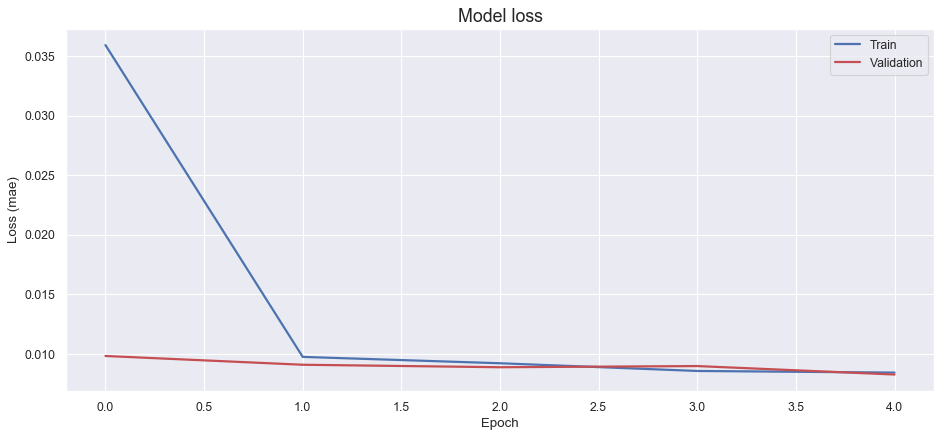

In [66]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [67]:
y_pred=model2.predict(X_test)

tl_acc = 1 - history['loss'][0]
tl_prec = precision_score(y_pred, y_test,average='weighted')
tl_rec = recall_score(y_pred, y_test,average='weighted')
tl_f1 = f1_score(y_pred, y_test,average='weighted')

In [68]:
storeResults('Transformer LSTM',tl_acc,tl_prec,tl_rec,tl_f1)

# Transformer - Encoder and Decoder

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.33, random_state=1)

In [70]:
import matplotlib.pyplot as plt
n_train = np.array(X_train)
n_test = np.array(X_test)

8
(289018, 8)


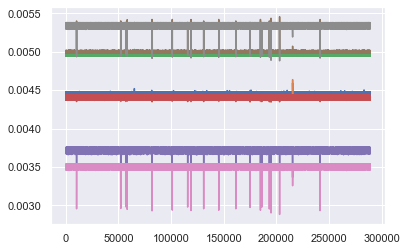

In [71]:
from keras.layers import Input, Dense
from keras.models import Model
import tensorflow as tf

input_dim = n_train.shape[1]
feature_dim = [25, 20, 15, 10]
print(input_dim)
inputs = Input(shape=(input_dim,))
encoded = inputs
encoded = Dense(feature_dim[0], kernel_initializer="uniform")(encoded)
encoded = Dense(feature_dim[1], kernel_initializer="uniform")(encoded)
encoded = Dense(feature_dim[2], kernel_initializer="uniform")(encoded)
encoded = Dense(feature_dim[3], kernel_initializer="uniform")(encoded)

decoded = encoded
decoded = Dense(feature_dim[2], kernel_initializer="uniform")(decoded)
decoded = Dense(feature_dim[1], kernel_initializer="uniform")(decoded)
decoded = Dense(feature_dim[0], kernel_initializer="uniform")(decoded)
decoded = Dense(input_dim, kernel_initializer="uniform")(decoded)


autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')

autoencoder.fit(n_train, n_train,
                verbose=0,
                epochs=5,
                batch_size=2,
                shuffle=True,
                validation_data=(n_test, n_test),
               steps_per_epoch=500,
               validation_steps=500)

predict_vals = autoencoder.predict(n_train)
print(predict_vals.shape)
plt.plot(predict_vals)
plt.show()

In [72]:
from keras.models import Sequential

featuremodel = Sequential()
featuremodel.add(Dense(feature_dim[0], input_shape=(input_dim,), weights=autoencoder.layers[1].get_weights()))
featuremodel.add(Dense(feature_dim[1], weights=autoencoder.layers[2].get_weights()))
featuremodel.add(Dense(feature_dim[2], weights=autoencoder.layers[3].get_weights()))
featuremodel.add(Dense(feature_dim[3], weights=autoencoder.layers[4].get_weights()))

featuremodel.compile(optimizer='adadelta', loss='mse')

In [73]:
y_pred = autoencoder.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

ende_acc = accuracy_score(y_pred, y_test)
ende_prec = precision_score(y_pred, y_test,average='weighted')
ende_rec = recall_score(y_pred, y_test,average='weighted')
ende_f1 = f1_score(y_pred, y_test,average='weighted')

4449/4449 [==============================] - ETA: 58 - ETA: 1 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 3s 653us/step


In [74]:
storeResults('Transformer Encode-Decode',ende_acc,ende_prec,ende_rec,ende_f1)

# Comparison

In [75]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'Precision': precision,
                        'Recall'   : recall,
                        'F1-Score': f1score
                      })

In [76]:
result

,ML Model,Accuracy,Precision,Recall,F1-Score
0,SVM,0.414,0.744,0.414,0.423
1,Bagging Classifier,0.918,0.968,0.918,0.938
2,Voting Classifier,0.918,0.968,0.918,0.938
3,LSTM,0.227,1.000,0.227,0.371
4,RNN,0.227,1.000,0.227,0.371
5,CNN + LSTM,0.873,0.956,0.873,0.901
6,FNN,0.227,1.000,0.227,0.371
7,Transformer LSTM,0.964,1.000,0.009,0.017
8,Transformer Encode-Decode,0.024,1.000,0.024,0.047


# MOdelling

In [77]:
import joblib
filename = 'model_cicids2019.sav'
joblib.dump(eclf1, filename)

['model_cicids2019.sav']

# Graph

In [78]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

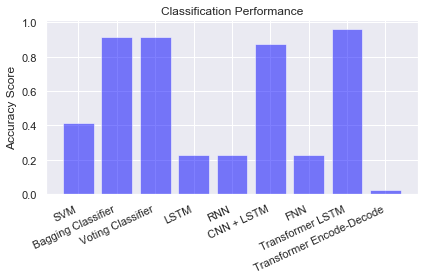

In [83]:
import matplotlib.pyplot as plt2

# Example data (assuming you have these variables defined)
# y_pos = [0, 1, 2]  # Example indices
# accuracy = [0.8, 0.6, 0.9]  # Example accuracy scores
# classifier = ['Classifier A', 'Classifier B', 'Classifier C']

y_pos = range(len(classifier))

# Swap axes by using bar instead of barh
plt.bar(y_pos, accuracy, align='center', alpha=0.5, color='blue')

# Add x-tick labels for classifiers and rotate them for better readability
plt.xticks(y_pos, classifier, rotation=25, ha='right')

# Add axis labels and title
plt.ylabel('Accuracy Score')

plt.title('Classification Performance')

# Display the plot
plt.tight_layout()  # Ensures proper spacing of elements
plt.show()

# Precision

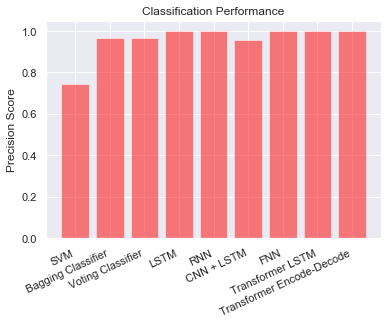

In [84]:
plt2.bar(y_pos, precision, align='center', alpha=0.5, color='red') # Change to bar()
plt.xticks(y_pos, classifier, rotation=25, ha='right')
plt2.xticks(y_pos, classifier)  # Update from yticks to xticks
plt2.ylabel('Precision Score')   # Update from xlabel to ylabel
plt2.title('Classification Performance')
plt2.show()

# Recall

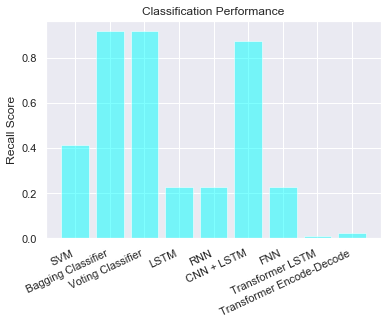

In [85]:
import matplotlib.pyplot as plt2

# Example data (assuming you have these variables defined)
# y_pos = [0, 1, 2]  # Example indices
# recall = [0.85, 0.75, 0.65]  # Example recall scores
# classifier = ['Classifier A', 'Classifier B', 'Classifier C']

plt2.bar(y_pos, recall, align='center', alpha=0.5, color='cyan')  # Change to bar()
plt.xticks(y_pos, classifier, rotation=25, ha='right')

plt2.xticks(y_pos, classifier)  # Update from yticks to xticks
plt2.ylabel('Recall Score')     # Update from xlabel to ylabel
plt2.title('Classification Performance')
plt2.show()

# F1 Score

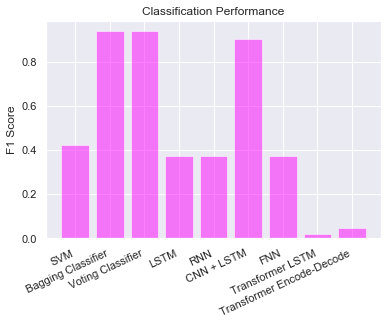

In [86]:
import matplotlib.pyplot as plt2

# Example data (assuming you have these variables defined)
# y_pos = [0, 1, 2]  # Example indices
# f1score = [0.8, 0.7, 0.9]  # Example F1 scores
# classifier = ['Classifier A', 'Classifier B', 'Classifier C']

plt2.bar(y_pos, f1score, align='center', alpha=0.5, color='magenta')  # Change to bar()
plt.xticks(y_pos, classifier, rotation=25, ha='right')
plt2.xticks(y_pos, classifier)  # Update from yticks to xticks
plt2.ylabel('F1 Score')         # Update from xlabel to ylabel
plt2.title('Classification Performance')
plt2.show()